In [1]:
####################
#14-lesson ML in Python crash course 
#from Jason Brownlee's e-book
####################

## Lesson 1:
## Download and Install Python and SciPy ecosystem

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))



Python: 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
scipy: 0.19.0
numpy: 1.11.3
matplotlib: 1.5.3
pandas: 0.18.1
sklearn: 0.18.1


In [2]:
## Lesson 2
## Get around in Python, NumPy, Matplotlib and Pandas

#dataframe
import numpy
import pandas
myarray = numpy.array([[1,2,3], [4,5,6]])
rownames = ['a', 'b']
colnames = ['one', 'two','three']
mydataframe = pandas.DataFrame(myarray, index=rownames, columns=colnames)
print(mydataframe)

   one  two  three
a    1    2      3
b    4    5      6


In [3]:
## Lesson 3
## Load data from csv

from pandas import read_csv
url = "http://goo.gl/vh1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names=names)
print(data.shape)

(11, 9)


In [10]:
## Lesson 4
## Understand data with descriptive statistics

from pandas import read_csv
url = "http://goo.gl/vh1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names=names)
description = data.describe()
print(description)

       plas  pres  skin  test  mass  pedi  age  class
count   0.0   0.0   0.0   0.0   0.0   0.0  0.0    0.0
mean    NaN   NaN   NaN   NaN   NaN   NaN  NaN    NaN
std     NaN   NaN   NaN   NaN   NaN   NaN  NaN    NaN
min     NaN   NaN   NaN   NaN   NaN   NaN  NaN    NaN
25%     NaN   NaN   NaN   NaN   NaN   NaN  NaN    NaN
50%     NaN   NaN   NaN   NaN   NaN   NaN  NaN    NaN
75%     NaN   NaN   NaN   NaN   NaN   NaN  NaN    NaN
max     NaN   NaN   NaN   NaN   NaN   NaN  NaN    NaN


//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


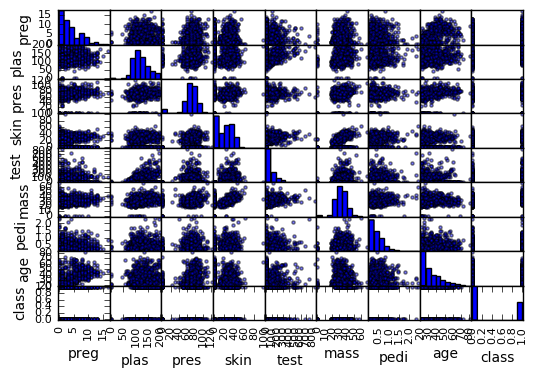

In [4]:
## Lesson 5
## Understand data with visualization

# Scatter Plot Matrix
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names=names)
scatter_matrix(data)
plt.show()

In [15]:
## Lesson 6
## Prepare for modeling by pre-processing data

#Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
import numpy
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [7]:
## Lesson 7
## Algorithm Evaluation with resampling methods

# Evaluate using cross-validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0,results.std()*100.0))

Accuracy: 76.951% (4.841%)


In [9]:
## Lesson 8
## Algorithm Evaluation Metrics
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.493 (0.047)


In [10]:
## Lesson 9
## Spot-Check Algorithms

# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
url = "https://goo.gl/sXleFv"
names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
         'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,8]
kfold = KFold(n_splits=10,random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-159.493455686


In [13]:
## Lesson 10
## Model Comparison and Selection

# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load dataset
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# compare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
   kfold = KFold(n_splits=10,random_state = 7)
   cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)


In [15]:
## Lesson 11
## Improve Accuracy with Algorithm Tuning

# Grid Search for Algorithm tuning
from pandas import read_csv
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001, 0.0001, 0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.279617559313
1.0


In [19]:
## Lesson 12
## Improve Accuracy with Ensemble Predictions

# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.764251537936


In [23]:
## Lession 13
## Finalize and Save your model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas','pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, 
                                                    random_state=seed)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train,Y_train)
# save the model to disk
filename = "finalized_model.sav"
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.755905511811


View dimensions
(150, 5)

Describe data
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Show scatter plot


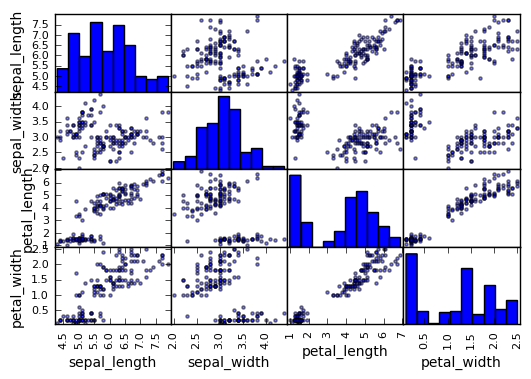


[[-0.901  1.032 -1.341 -1.313]
 [-1.143 -0.125 -1.341 -1.313]
 [-1.385  0.338 -1.398 -1.313]
 [-1.507  0.106 -1.284 -1.313]
 [-1.022  1.263 -1.341 -1.313]]

Accuracy: 88.000% (14.847%)




//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [19]:
## Lesson 14
## Reproduce ML workflow with the iris dataset

#import modules
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

import numpy


#import data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width','petal_length', 'petal_width','class']
data = read_csv(url, sep=",",names=names)

print("View dimensions")
print(data.shape)
print("")
print("Describe data")
description = data.describe()
print(description)
print("")
print("Show scatter plot")
scatter_matrix(data)
plt.show()
print("")
dataframe = data
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])
print("")
kfold = KFold(10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0,results.std()*100.0))
print("")
#scoring = 'neg_log_loss'
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
print("")
#model = KNeighborsRegressor()
#scoring = 'neg_mean_squared_error'
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#print(results.mean())